### 이상값 처리

In [1]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

if os.name == 'nt': 
    font_family = 'Malgun Gothic'
else: #Mac
    font_family = 'AppleGothic'
sns.set(font = font_family, rc = {"axes.unicode_minus" : False}) 

In [2]:
# 3천개 랜덤 데이터 생성
np_data = np.random.randint(1,100,size=3000)
data = list(np_data)
data[0:2]

[45, 30]

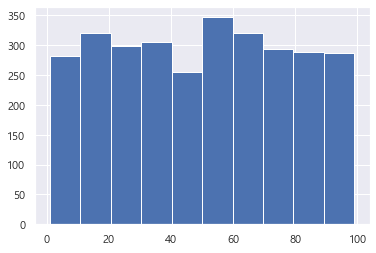

In [3]:
plt.hist(data)
plt.show()

[0.00315981 0.00315981 0.00315981 ... 0.00309803 0.00309803 0.00309803]


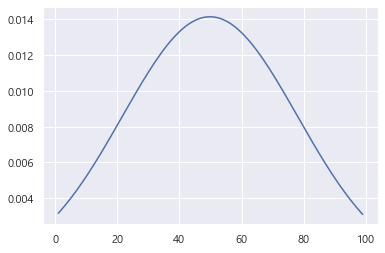

In [4]:
data_mean = np.mean(data)
data_std = np.std(data)

#확률 밀도 함수 생성 (확률변수값들 x, 확률변수값들의 평균, 확률변수값들의 표준편차)
pdf = stats.norm.pdf(np.sort(data),data_mean,data_std)
print(pdf)
plt.figure()
plt.plot(np.sort(data),pdf)

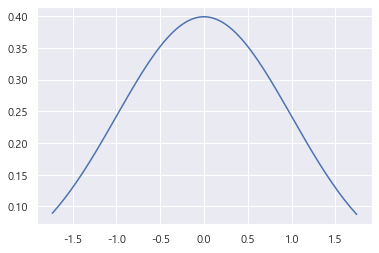

In [5]:
# 표준정규분포 (Z분포) 로 변환
std_list = []

for i in data:
    z = (i -data_mean) / data_std
    std_list.append(z)
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

ol_pdf = stats.norm.pdf(np.sort(std_list),ol_data_mean,ol_data_std)
plt.figure()
plt.plot(np.sort(std_list),ol_pdf)

49.96644518272425
28.38623977023915


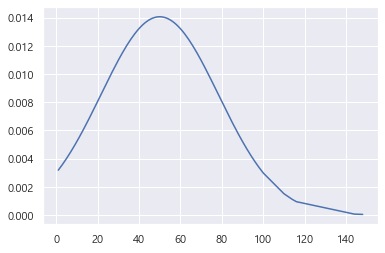

In [6]:
# 이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0,len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2) # 이상값 10개 생성

# 이상값이 추가된 데이터의 정규분포
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),ol_data_mean,ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data),ol_pdf)

8.73424625352947e-17
1.0


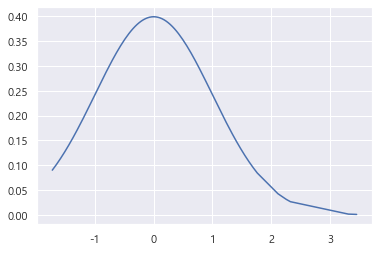

In [7]:
# 이상값 추가된 데이터의 표준화

ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)

ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [8]:
len(ol_std_list)

3010

In [9]:
# -2 ~ 2 범위 벗어나면 이상값으로 제거
for i in ol_std_list:
    z = i
    if z > 2:
        ol_std_list.remove(z)
    if z < -2:
        ol_std_list.remove(z)

In [10]:
len(ol_std_list)

3005

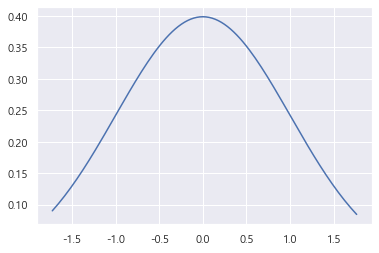

In [11]:
# 이상값 제거후 표준 정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [12]:
boxdata = pd.DataFrame(np.random.randn(100,3),columns=['A열','B열','C열'])
boxdata.head()

,A열,B열,C열
0,0.435172,-0.943565,1.707027
1,-0.477856,0.773166,-0.618479
2,-0.712610,0.919806,-0.524825
3,1.334777,-1.381371,0.394367
4,-0.574078,-1.289388,2.543657


In [13]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.038102,-0.169010,0.127996
std,0.930995,0.936082,1.030655
min,-2.716220,-2.377377,-4.410342
25%,-0.565717,-0.682789,-0.383430
50%,0.033744,-0.179253,0.194906
75%,0.665333,0.415019,0.783127
max,2.052599,1.917743,2.543657


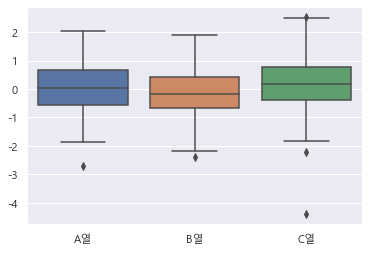

In [14]:
# 박스 플롯을 이용한 이상값 확인
sns.boxplot(data = boxdata)
plt.show()

In [15]:
# 이상값 계산하는 함수
def get_outlier(df=None,column=None,weight = 1.5):
    quantile_25 = np.percentile(df[column].values,25)
    quantile_75 = np.percentile(df[column].values,75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR *weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

In [16]:
outlier_idx = get_outlier(df=boxdata,column='B열',weight=1.5)
outlier_idx

Int64Index([5], dtype='int64')

In [17]:
boxdata.iloc[outlier_idx]

,A열,B열,C열
5,-0.872122,-2.377377,0.58878


In [18]:
# 이상값 삭제
boxdata.drop(outlier_idx,axis=0,inplace=True)

In [19]:
boxdata.shape

(99, 3)

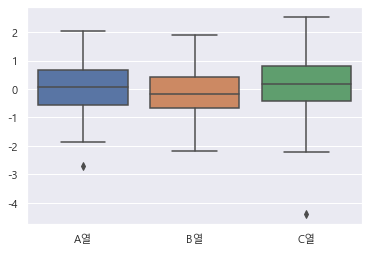

In [20]:
sns.boxplot(data=boxdata)
plt.show() # B열의 이상값 삭제됨

In [21]:
# 함수 사용해서 이상 값 확인

outlier_idx = get_outlier(df=boxdata,column='C열', weight=1.5)
print(outlier_idx)

Int64Index([79], dtype='int64')


In [22]:
boxdata.drop(outlier_idx,axis=0,inplace=True)
boxdata.shape # 이상 값 C열 하나더 삭제됨

(98, 3)

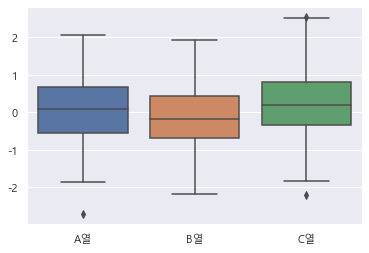

In [23]:
sns.boxplot(data=boxdata)
plt.show() # 이상값 B열 C열 다 삭제됨